# Face Detection Lab

Here will we try some methods for face detection using different libraries.

In [1]:
import matplotlib.pyplot as plt
from face_alignment.detection.sfd.sfd_detector import SFDDetector
import mediapipe as mp
import os
import cv2
import numpy as np


2024-09-21 14:17:42.387358: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-21 14:17:42.395368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-21 14:17:42.404572: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-21 14:17:42.407332: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-21 14:17:42.414473: I tensorflow/core/platform/cpu_feature_guar

In [2]:
image_dir = "../data/uncropped_images"

In [3]:
import face_alignment
from skimage import io

model = face_alignment.detection.sfd.sfd_detector.SFDDetector(device="cuda")

input = io.imread('../data/uncropped_images/anger.jpeg')
det = model.detect_from_image(input)

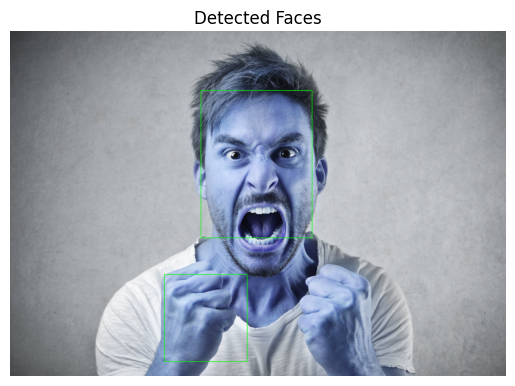

In [4]:
# Assuming `det` contains detection results and `input` is the image
# Loop through detected faces
for face in det:
    x1, y1, x2, y2, confidence = face
    if confidence > 0.5:  # Filter based on confidence threshold
        # Convert to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        # Draw the rectangle (bounding box)
        input = cv2.rectangle(input, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Convert BGR (OpenCV default) to RGB for displaying in matplotlib
input_rgb = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

# Use matplotlib to display the result
plt.imshow(input_rgb)
plt.axis('off')  # Hide axis for a cleaner display
plt.title("Detected Faces")
plt.show()  # Display the image

[array([304.98518133, 162.96327972, 444.36472845, 341.45311737,
         0.99999988]), array([451.04005527, 346.82226849, 566.58789921, 497.85949993,
         0.99999988]), array([549.14333892, 138.31632054, 703.46345305, 344.70378697,
         0.99998808])]
[304.98518133 162.96327972 444.36472845 341.45311737   0.99999988]
[451.04005527 346.82226849 566.58789921 497.85949993   0.99999988]
[549.14333892 138.31632054 703.46345305 344.70378697   0.99998808]


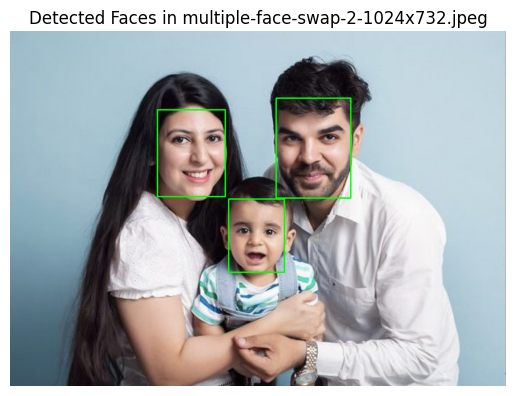

[array([548.6810565 ,  70.64377594, 871.55190611, 583.14408112,
         0.99999988])]
[548.6810565   70.64377594 871.55190611 583.14408112   0.99999988]


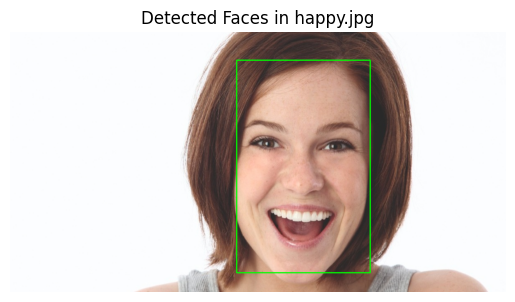

[array([397.60346794, 101.07822037, 601.04540825, 427.40246964,
         0.99999964])]
[397.60346794 101.07822037 601.04540825 427.40246964   0.99999964]


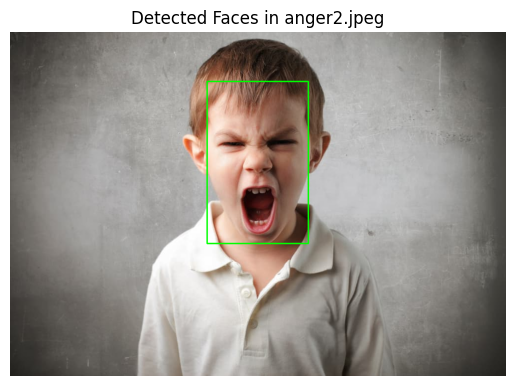

[array([416.74538231, 103.33358002, 585.00020409, 326.51282501,
         0.99999881])]
[416.74538231 103.33358002 585.00020409 326.51282501   0.99999881]


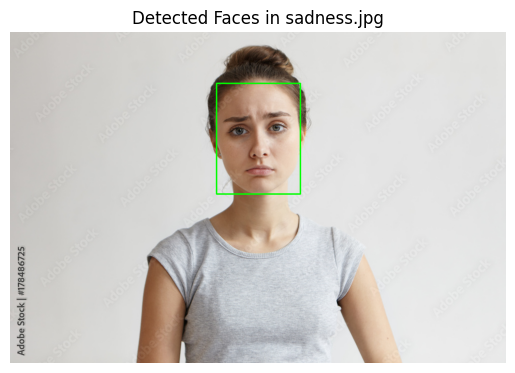

[array([9.62699530e+02, 2.99706623e+02, 1.52295228e+03, 1.04186257e+03,
       1.00000000e+00]), array([7.78071873e+02, 1.22647147e+03, 1.19578019e+03, 1.66412338e+03,
       7.31239378e-01])]
[9.62699530e+02 2.99706623e+02 1.52295228e+03 1.04186257e+03
 1.00000000e+00]
[7.78071873e+02 1.22647147e+03 1.19578019e+03 1.66412338e+03
 7.31239378e-01]


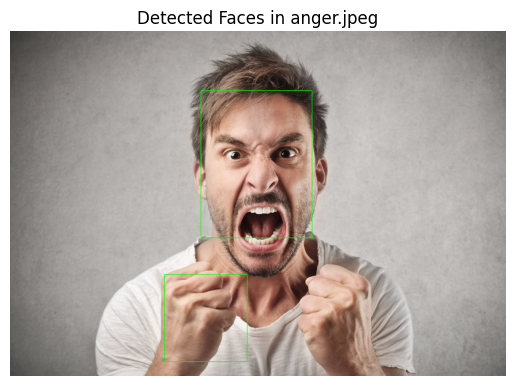

[array([255.87549591, 139.42019081, 512.21515656, 530.95162392,
         0.99999595])]
[255.87549591 139.42019081 512.21515656 530.95162392   0.99999595]


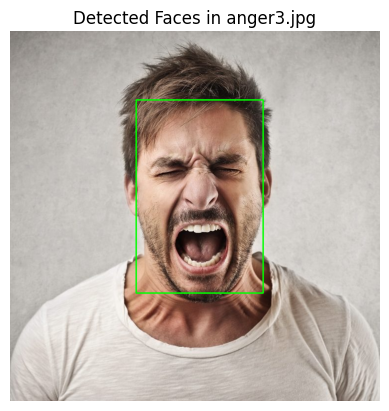

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Loop through images in the folder
for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip invalid images

    # Convert BGR to RGB for matplotlib
    frame_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run face detection using your model
    results = model.detect_from_image(frame_rgb)
    
    # Print detection results
    print(results)
    
    # If faces are detected
    if results:
        for detection in results:
            print(detection)
            x1, y1, x2, y2, confidence = detection
            if confidence > 0.5:  # Filter based on confidence threshold
                # Convert to integers
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                
                # Draw rectangles (bounding boxes) around detected faces
                frame_rgb = cv2.rectangle(frame_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Use matplotlib to display the image
        plt.imshow(frame_rgb)
        plt.axis('off')  # Hide axes
        plt.title(f"Detected Faces in {img_file}")
        plt.show()  # Display the image


[label_id: 0
score: 0.967008948
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.288735688
    ymin: 0.264206
    width: 0.14710331
    height: 0.205784023
  }
  relative_keypoints {
    x: 0.347313732
    y: 0.310632944
  }
  relative_keypoints {
    x: 0.410003603
    y: 0.324435413
  }
  relative_keypoints {
    x: 0.384620935
    y: 0.365478039
  }
  relative_keypoints {
    x: 0.377063
    y: 0.408144951
  }
  relative_keypoints {
    x: 0.29205367
    y: 0.327383935
  }
  relative_keypoints {
    x: 0.426883876
    y: 0.352476597
  }
}
, label_id: 0
score: 0.947596967
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.533384204
    ymin: 0.234367833
    width: 0.176361322
    height: 0.246713
  }
  relative_keypoints {
    x: 0.577277482
    y: 0.318022251
  }
  relative_keypoints {
    x: 0.649514616
    y: 0.312339187
  }
  relative_keypoints {
    x: 0.611789644
    y: 0.383777797
  }
  relative_keypoints 

I0000 00:00:1726922203.133318   13182 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1726922203.134317   14155 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.9-0ubuntu0.1), renderer: Mesa Intel(R) Graphics (ADL GT2)
W0000 00:00:1726922203.137230   14146 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


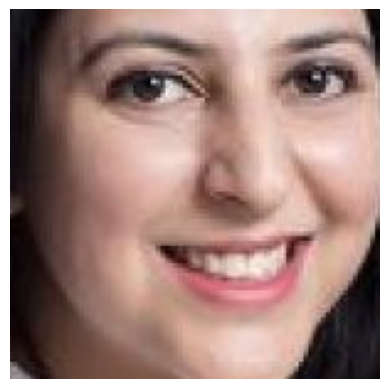

Detected face 1:


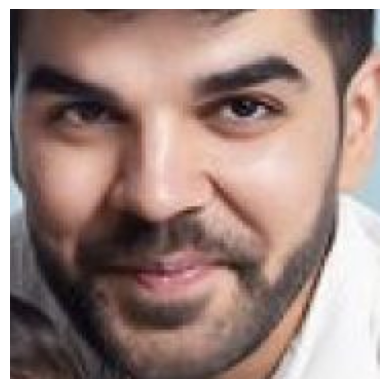

Detected face 2:


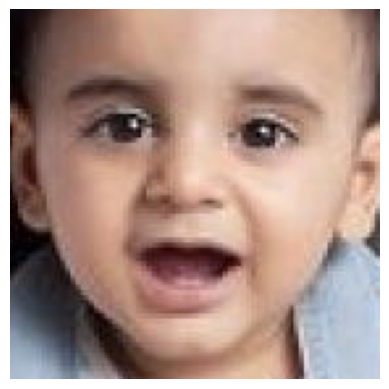

[label_id: 0
score: 0.968937337
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.40795365
    ymin: 0.247171462
    width: 0.362159222
    height: 0.689774036
  }
  relative_keypoints {
    x: 0.518366933
    y: 0.447874069
  }
  relative_keypoints {
    x: 0.660763621
    y: 0.453438878
  }
  relative_keypoints {
    x: 0.586824477
    y: 0.637383759
  }
  relative_keypoints {
    x: 0.583953261
    y: 0.763653338
  }
  relative_keypoints {
    x: 0.440529794
    y: 0.481883645
  }
  relative_keypoints {
    x: 0.737522662
    y: 0.498826444
  }
}
]
Detected face 0:


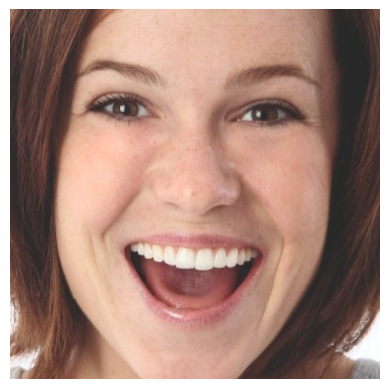

[label_id: 0
score: 0.896496177
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.384926945
    ymin: 0.246838883
    width: 0.237205297
    height: 0.34179455
  }
  relative_keypoints {
    x: 0.449301571
    y: 0.355883121
  }
  relative_keypoints {
    x: 0.551247954
    y: 0.343259573
  }
  relative_keypoints {
    x: 0.506632209
    y: 0.435176253
  }
  relative_keypoints {
    x: 0.510827899
    y: 0.498741448
  }
  relative_keypoints {
    x: 0.393402219
    y: 0.382694483
  }
  relative_keypoints {
    x: 0.611424267
    y: 0.354197621
  }
}
]
Detected face 0:


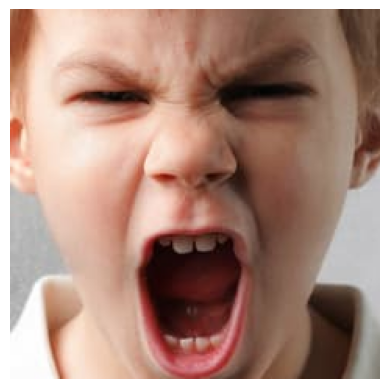

[label_id: 0
score: 0.958093405
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.414164364
    ymin: 0.225862339
    width: 0.188995838
    height: 0.283352375
  }
  relative_keypoints {
    x: 0.457779557
    y: 0.311816633
  }
  relative_keypoints {
    x: 0.538747609
    y: 0.299325049
  }
  relative_keypoints {
    x: 0.495263636
    y: 0.374242544
  }
  relative_keypoints {
    x: 0.502233684
    y: 0.429082394
  }
  relative_keypoints {
    x: 0.425885141
    y: 0.341165602
  }
  relative_keypoints {
    x: 0.596684933
    y: 0.316244304
  }
}
]
Detected face 0:


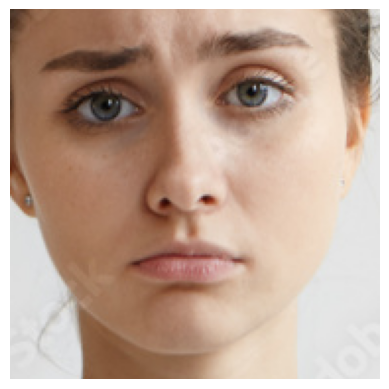

[label_id: 0
score: 0.946783602
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.385022104
    ymin: 0.266587645
    width: 0.23604387
    height: 0.33972916
  }
  relative_keypoints {
    x: 0.467018604
    y: 0.364819348
  }
  relative_keypoints {
    x: 0.561933279
    y: 0.367951095
  }
  relative_keypoints {
    x: 0.52170217
    y: 0.451860964
  }
  relative_keypoints {
    x: 0.516790688
    y: 0.515293896
  }
  relative_keypoints {
    x: 0.398053825
    y: 0.385330856
  }
  relative_keypoints {
    x: 0.601465
    y: 0.389786541
  }
}
]
Detected face 0:


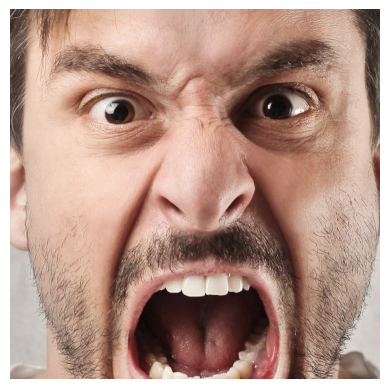

[label_id: 0
score: 0.869737327
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.326049805
    ymin: 0.28389895
    width: 0.372871399
    height: 0.372831643
  }
  relative_keypoints {
    x: 0.439473361
    y: 0.386226624
  }
  relative_keypoints {
    x: 0.596292198
    y: 0.383378685
  }
  relative_keypoints {
    x: 0.525974512
    y: 0.475159258
  }
  relative_keypoints {
    x: 0.524005055
    y: 0.554664671
  }
  relative_keypoints {
    x: 0.345470697
    y: 0.423638642
  }
  relative_keypoints {
    x: 0.671815455
    y: 0.417371094
  }
}
]
Detected face 0:


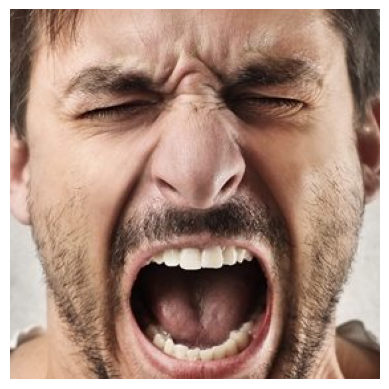

In [9]:
mp_face_detection = mp.solutions.face_detection.FaceDetection(min_detection_confidence=0.5)

for img_file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_file)

    # Load the image
    img = cv2.imread(img_path)
    if img is None:
        continue  # Skip invalid images

    frame_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = mp_face_detection.process(frame_rgb)
    
    print(results.detections)
    
    if results.detections:
        for face_id, detection in enumerate(results.detections):
            
            
            print(f"Detected face {face_id}:")
            
            # Get the bounding box around the face
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(
                bboxC.height * ih)

            # Crop the face from the frame
            face_img = img[y:y + h, x:x + w]
            
            # Plot the cropped face image
            plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
    